In [106]:
S = 80
X = 80
T = 2
r = 0.04
sigma = 0.5
N = 20

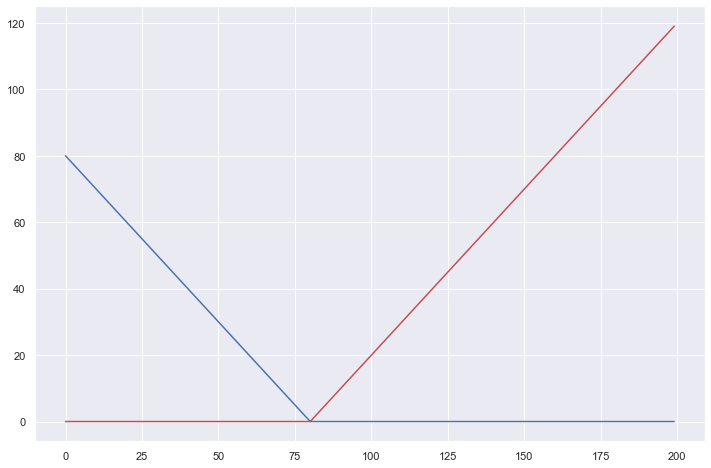

In [116]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
delS = np.arange(0, 200)
    
# European options
def callPrice(S, X, r, T, sigma): 
    d1 = (np.log(S/X) + (r + 0.5 * sigma**2)*T)/(sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return (S * norm.cdf(d1) - X * np.exp(-r * T) * norm.cdf(d2))

def putPrice(S, X, r, T, sigma):
    d1 = (np.log(S/X) + (r + 0.5 * sigma**2)*T)/(sigma * np.sqrt(T));
    d2 = d1 - sigma * np.sqrt(T);
    return (X * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1))

def callPayoff(S, X, callprice):
    return list(map(lambda s: max(s - X, 0), S))

def putPayoff(S, X, putPrice):
    return list(map(lambda s: max(X - s, 0), S))

callprice = callPrice(S, X, r, T, sigma)
callpayof = callPayoff(delS, X, callprice)

putprice = putPrice(S, X, r, T, sigma)
putpayof = putPayoff(delS, X, putprice)

sns.set(rc={'figure.figsize':(12,8)})
plt.subplot(111)
plt.plot(delS, callpayof, 'r', label = "callPayoff")
plt.plot(delS, putpayof, 'b', label = "putPayoff")

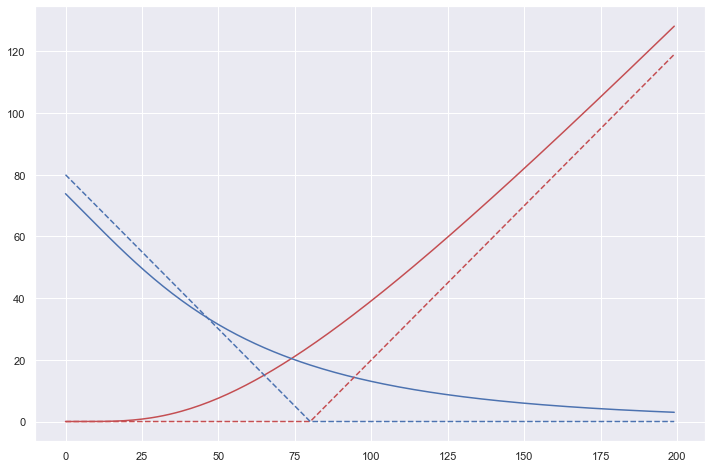

In [117]:
vals_call = [callPrice(S, X, r, T, sigma) for S in delS]
vals_put = [putPrice(S, X, r, T, sigma) for S in delS]
plt.plot(delS, vals_call, 'r', label = "Call")
plt.plot(delS, vals_put, 'b', label  = "Put")
plt.plot(delS, callpayof, 'r', linestyle = '--', label = "callPayoff")
plt.plot(delS, putpayof, 'b', linestyle = '--', label = "putPayoff")
plt.show()

In [119]:
# Binomial model
dt = T / N
u = np.exp(sigma*np.sqrt(dt))
d = np.exp(-sigma*np.sqrt(dt))
p = (np.exp(r*dt) - d) / (u - d)

def Sij(S, u, d, j):
    return S * (u**i) * d(j-i)

# European 
def callBinomial(n, p, S, u, d, X):
    i = range(n) 
    return np.exp(-r*T) * (n / (i*(n-i)))*(p**i)*((1-p)**(n-i))*max(Sij(S, u, d, n) - X, 0)
def putBinomial(n, p, S, u, d, X):
    i = range(n) 
    return np.exp(-r*T) * (n / (i*(n-i)))*(p**i)*((1-p)**(n-i))*max(-Sij(S, u, d, n) + X, 0)

# American put option
def AmericanPut(X, i, j, p):
    return max(X - Sij(S, u, d, j), np.exp(-r*T)*(p*AmericanPut(X, i+1, j+1, p) + (1-p)*AmericanPut(X, i, j+1, p)))

In [120]:
def binomial_call(S, K, T, r, sigma, N):
    dt = T / N
    u = np.exp(sigma*np.sqrt(dt))
    d = np.exp(-sigma*np.sqrt(dt))
    p = (np.exp(r*dt) - d) / (u - d)
    C = {}
    for m in range(0, N+1):
            C[(N, m)] = max(S * (u ** (2*m - N)) - K, 0)
    for k in range(N-1, -1, -1):
        for m in range(0,k+1):
            C[(k, m)] = np.exp(-r * dt) * (p * C[(k+1, m+1)] + (1-p) * C[(k+1, m)])
    return C[(0,0)]

def binomial_put(S, K, T, r, sigma, N):
    dt = T / N
    u = np.exp(sigma*np.sqrt(dt))
    d = np.exp(-sigma*np.sqrt(dt))
    p = (np.exp(r*dt) - d) / (u - d)
    C = {}
    for m in range(0, N+1):
            C[(N, m)] = max(S * (u ** (2*m - N)) - K, 0)
    for k in range(N-1, -1, -1):
        for m in range(0,k+1):
            C[(k, m)] = np.exp(-r * dt) * (p * C[(k+1, m+1)] - (1-p) * C[(k+1, m)])
    return C[(0,0)]

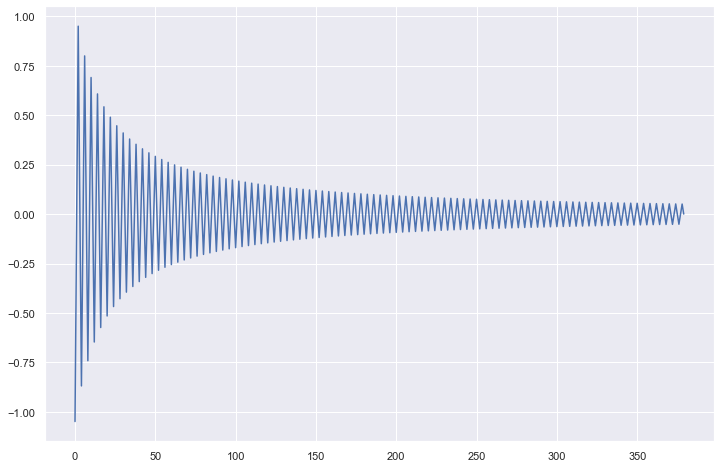

In [121]:
put = []
for N in range(20, 400):
#     print("With {:3d} steps, the price is {:.2f}".format(N,binomial_put(S, X, T, r, sigma, N)))
    put.append(binomial_put(S, X, T, r, sigma, N))
plt.plot(put)

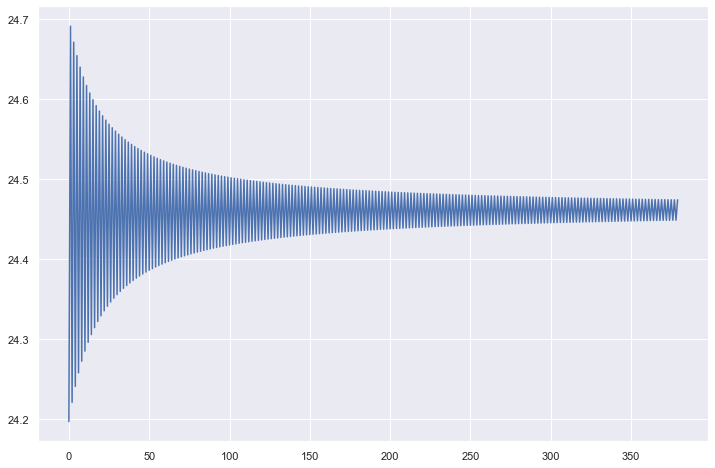

In [122]:
l = []
for N in range(20, 400):
#     print("With {:3d} steps, the price is {:.2f}".format(N,binomial_call(S, X, T, r, sigma, N)))
    l.append(binomial_call(S, X, T, r, sigma, N))
plt.plot(l)

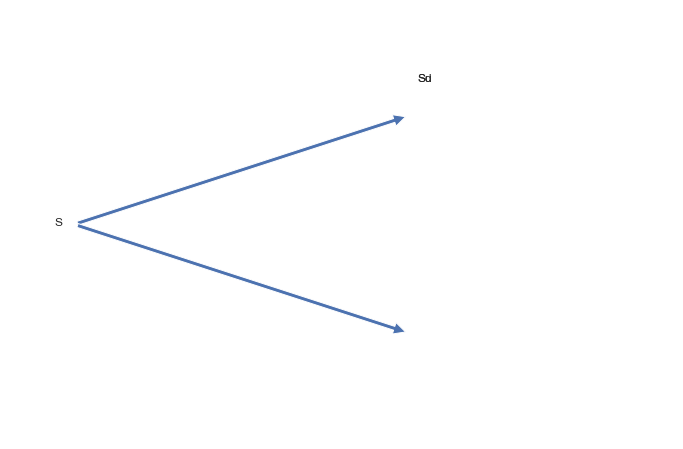

In [52]:
# TREE
plt.xlim(0,1)
plt.figtext(0.18, 0.5, 'S')
plt.figtext(0.6, 0.5+0.25, 'Su')
plt.figtext(0.6, 0.5+0.25, 'Sd')

plt.annotate('', xy=(0.6, 0.5+0.25), xytext=(0.1, 0.5), arrowprops=dict(facecolor='b',shrink=0.01))
plt.annotate('', xy=(0.6, 0.5-0.25), xytext=(0.1, 0.5), arrowprops=dict(facecolor='b',shrink=0.01))
plt.axis('off')
plt.show()

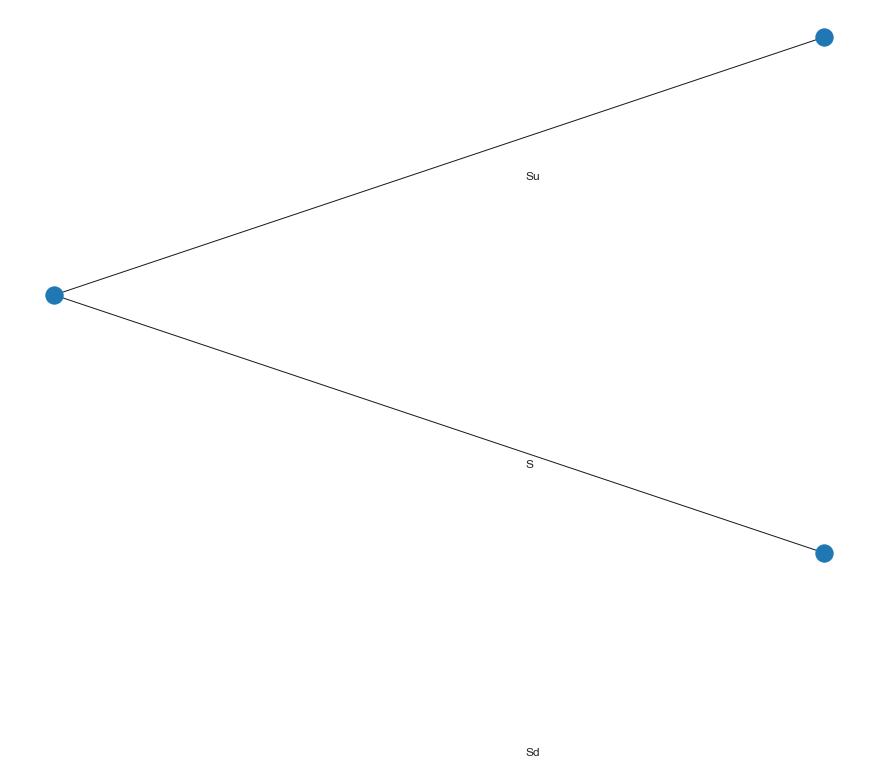

In [128]:
import networkx as nx

plt.figtext(0.6, 0.2, 'S')
plt.figtext(0.6, 0.2+0.5, 'Su')
plt.figtext(0.6, 0.2-0.5, 'Sd')
n = 1
def binomial_grid(n):
    G=nx.Graph()
    for i in range(0, n+1):
        for j in range(1, i+2):
            if i < n:
                G.add_edge((i,j),(i+1,j))
                G.add_edge((i,j),(i+1,j+1))
    posG={}
    for node in G.nodes():
        posG[node] = (node[0], n+2+node[0]-2*node[1])
    nx.draw(G,pos=posG)
binomial_grid(n=1)
plt.show()